3. Lost in the closet (Classification)

In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import time
import matplotlib.pyplot as plt
import numpy as np
import random

train_set = torchvision.datasets.FashionMNIST(root = ".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
# Fix the seed to be able to get the same randomness across runs and
# hence reproducible outcomes
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
# If you are using CuDNN , otherwise you can just ignore
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

100%|██████████| 26421880/26421880 [00:03<00:00, 8574433.45it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 144786.80it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2767142.71it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18068851.04it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Visualise data for the first element of the batch:
(since the batch is set will allways display same picture)

Label is: 9
Dimension of input data: torch.Size([32, 1, 28, 28])
Dimension of labels: torch.Size([32])


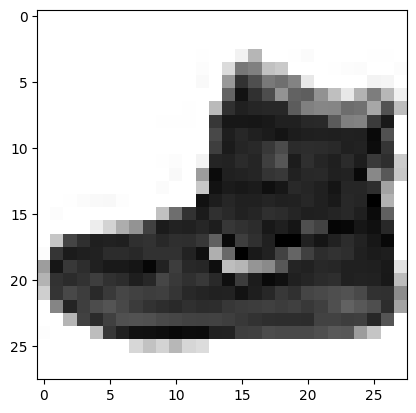

In [ ]:
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

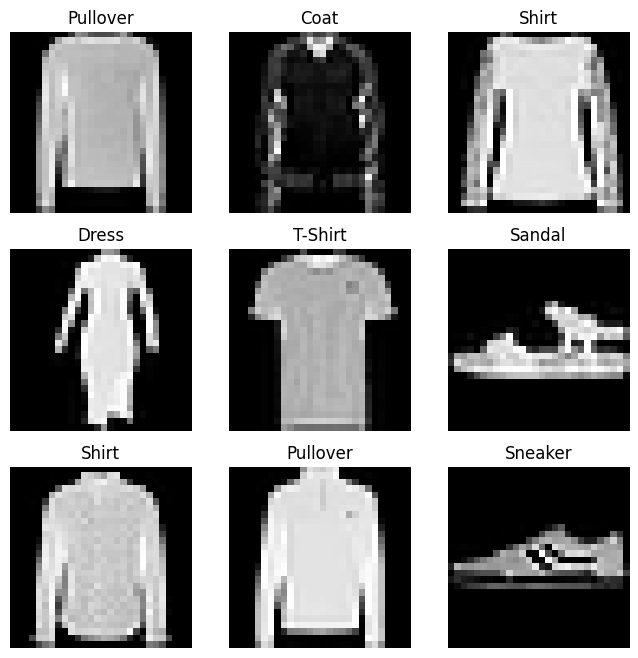

In [ ]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 3;
rows = 3;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_set));
    img = train_set[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_set[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')

1) Given the problem, what is the most appropriate loss function to use?

2) Create and train a Convolutional Neural Network corresponding to the following architecture:

    1. Input image size: 28 × 28 × 1 (height × width × number of channels).
    2. First convolutional layer: Kernel size (5 × 5), Stride size (1 × 1) and 32 output channels. Activation function.
    3. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
    4. Second convolutional layer: Kernel size (5×5), Stride size (1 × 1) and 64 output channels. Activation function.
    5. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
    6. First fully-connected layer with input size being the output size of max pooling layer in 5.(flattened, i.e. 1024) and output size 1024. Activation function.
    7. Second fully-connected layer with input size being the output size of fully connected layer in (i.e. 1024) and output size 256. Activation function.
    8. Output layer with input size being the output size of fully-connected layer in 7. (i.e. 256) and output size 10.

In [ ]:
# Build the neural network, expand on top of nn.Module
class MyCNN(nn.Module):
    def __init__(self,num_classes=10,activation="relu",dropout_rate=0,training_flag=True):
        super(MyCNN, self).__init__()

        self.num_classes = num_classes # 10 here
        self.activation = activation # which activation function to employ
        self.dropout_rate = dropout_rate # if dropout then  how much
        self.training_flag = training_flag # if dropout then trainable or not

        if self.activation == "relu":
          self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32,kernel_size=5,stride=1), nn.ReLU(), nn.MaxPool2d(2,stride=2), nn.Conv2d(32,64,kernel_size=5,stride=1), nn.ReLU(), nn.MaxPool2d(2,stride=2))
          self.fc_model = nn.Sequential(nn.Linear(1024,256), nn.ReLU(), nn.Linear(256,10), nn.ReLU())
        # set different activation frunction for task 3
        if self.activation == "tanh":
          self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32,kernel_size=5,stride=1), nn.Tanh(), nn.MaxPool2d(2,stride=2), nn.Conv2d(32,64,kernel_size=5,stride=1), nn.Tanh(), nn.MaxPool2d(2,stride=2))
          self.fc_model = nn.Sequential(nn.Linear(1024,1024), nn.Tanh(), nn.Linear(1024,256), nn.Tanh(), nn.Linear(256,10), nn.Tanh())
        if self.activation == "sigmoid":
          self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32,kernel_size=5,stride=1), nn.Sigmoid(), nn.MaxPool2d(2,stride=2), nn.Conv2d(32,64,kernel_size=5,stride=1), nn.Sigmoid(), nn.MaxPool2d(2,stride=2))
          self.fc_model = nn.Sequential(nn.Linear(1024,1024), nn.Sigmoid(),nn.Linear(1024,256), nn.Sigmoid(), nn.Linear(256,10), nn.Sigmoid())
        if self.activation == "elu":
          self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32,kernel_size=5,stride=1), nn.ELU(), nn.MaxPool2d(2,stride=2), nn.Conv2d(32,64,kernel_size=5,stride=1), nn.ELU(), nn.MaxPool2d(2,stride=2))
          self.fc_model = nn.Sequential(nn.Linear(1024,1024), nn.ELU(),nn.Linear(1024,256), nn.ELU(), nn.Linear(256,10), nn.ELU())
        # set dropout layer
        if self.dropout_rate != 0:
          self.cnn_model1 = nn.Sequential(nn.Conv2d(1,32,kernel_size=5,stride=1), nn.ReLU(), nn.MaxPool2d(2,stride=2), nn.Conv2d(32,64,kernel_size=5,stride=1), nn.ReLU(), nn.MaxPool2d(2,stride=2))
          self.fc_model = nn.Sequential(nn.Linear(1024,1024), nn.ReLU(),nn.Linear(1024,256), nn.ReLU(), nn.Linear(256,10), nn.ReLU(), nn.Dropout(self.dropout_rate))

    def forward(self, t):

        t = self.cnn_model1(t)
        t = t.view(t.size(0), -1)
        t = self.fc_model(t)

        return t

In [ ]:

def train(model,x,y,criterion,optimizer):

    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(x)
    # compute the loss
    loss = criterion(outputs, y)
    # calculate gradient
    loss.backward()
    # update parametres
    optimizer.step()

    return loss.item()

def evaluation(model,loader):

    # evaluation function
    correct = 0
    total = 0
    # turn off dropout layer
    model.eval()
    # torch.no_grad prevents backward recording, reduces memory consumtion
    with torch.no_grad():

        for i, (images,labels) in enumerate(loader):
            images, labels = images.to(device), labels.to(device)
            # since no_grad is used, generate autograd for this part of evaluation
            images = torch.autograd.Variable(images.float())
            labels = torch.autograd.Variable(labels)

            outputs = model(images)
            # the class with highest value is chosen for prediction
            # the result tuple of two output tensors (max, max_indices)
            # take only indices
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total if total > 0 else 0

In [ ]:
def classify(device,model,data,criterion,optimizer,*params):
    # Function to perform classifications with different parametres
    num_epochs,num_classes,batch_size,learning_rate,activation = params
    train_loader,test_loader = data
    # define parametres
    total_step = len(train_loader)
    train_losses = []
    train_accuracy = []
    test_accuracy = []
    tte = [] # time taken per epoch
    loss_epoch_array = []

    # start loop that goes through all epoch
    for epoch in range(num_epochs):
        loss_epoch = 0
        tte_start = time.time()
        # loop over batches
        for i, (images,labels) in enumerate(train_loader):
            # to ensure dropout is "turned on" while training, is set to 0 in all tasks but last
            model.train()
            # since no_grad is used, generate autograd for this part of evaluation
            images, labels = images.to(device), labels.to(device)
            images = torch.autograd.Variable(images.float())
            labels = torch.autograd.Variable(labels)

            loss = train(model,images,labels,criterion,optimizer)
            loss_epoch += loss
        # append the results and update time
        train_losses.append(loss)
        train_accuracy.append(evaluation(model,train_loader))
        test_accuracy.append(evaluation(model,test_loader))
        loss_epoch_array.append(loss_epoch)
        tte_end = time.time()
        elapsed_time = tte_end-tte_start
        tte.append(elapsed_time)
        # print results as soon as epoch ends
        print ('Epoch [{}/{}] {:.2f} sec, loss_epoch: {:.2f} ,train_loss: {:.4f}, train_acc: {:.4f}, test_acc: {:.4f}'.format(epoch+1, num_epochs, elapsed_time,loss_epoch,train_losses[-1], train_accuracy[-1],test_accuracy[-1]))
    # print final results
    final_test_accuracy = evaluation(model,test_loader)
    print('Test Accuracy of the model: {:.4f} %'.format(100 * final_test_accuracy))
    print('Total Time taken: {:.3f} sec'.format(sum(tte)))
    return train_losses, train_accuracy, test_accuracy, final_test_accuracy, elapsed_time, loss_epoch_array

In [ ]:
def weights_init(m):
  if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
    torch.nn.init.xavier_uniform_(m.weight)

For training, initialise your weights using the Xavier Uniform initialisation, use ReLU as the activation function, a learning rate of 0.1 with the SGD optimiser. Train neural network 30 epochs.

 a) Obtain accuracy

In [ ]:
result = []
num_epochs = 30
num_classes = 10
batch_size = 100
learning_rate = 0.1
activation = "relu"
dropout_rate = 0
training_flag = True
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = MyCNN(num_classes,activation=activation,dropout_rate=dropout_rate,training_flag=training_flag).to(device)
# initialise weights
net.apply(weights_init)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(list(net.parameters()), lr=learning_rate)
data = train_loader, test_loader
[train_loader,test_loader] = data

t_loss,t_acc,test_acc,final_test_accuracy,exec_time, loss_epoch_array = classify(device,net,data,criterion,optimizer,num_epochs,num_classes,batch_size,learning_rate,activation)
end = [learning_rate,activation,dropout_rate,num_epochs,t_loss,t_acc,test_acc,final_test_accuracy,exec_time]
result.append(end)

Epoch [1/30] 31.83 sec, loss_epoch: 1667.68 ,train_loss: 0.3982, train_acc: 0.8568, test_acc: 0.8468
Epoch [2/30] 23.52 sec, loss_epoch: 642.96 ,train_loss: 0.2733, train_acc: 0.8956, test_acc: 0.8807
Epoch [3/30] 23.43 sec, loss_epoch: 540.29 ,train_loss: 0.2032, train_acc: 0.9086, test_acc: 0.8925
Epoch [4/30] 23.86 sec, loss_epoch: 475.96 ,train_loss: 0.1991, train_acc: 0.9144, test_acc: 0.8957
Epoch [5/30] 23.73 sec, loss_epoch: 427.18 ,train_loss: 0.2037, train_acc: 0.9204, test_acc: 0.8979
Epoch [6/30] 23.61 sec, loss_epoch: 385.82 ,train_loss: 0.1848, train_acc: 0.9281, test_acc: 0.9015
Epoch [7/30] 23.39 sec, loss_epoch: 348.72 ,train_loss: 0.1623, train_acc: 0.9345, test_acc: 0.9019
Epoch [8/30] 23.78 sec, loss_epoch: 315.23 ,train_loss: 0.1484, train_acc: 0.9392, test_acc: 0.9048
Epoch [9/30] 24.42 sec, loss_epoch: 283.92 ,train_loss: 0.1666, train_acc: 0.9394, test_acc: 0.9026
Epoch [10/30] 24.41 sec, loss_epoch: 255.61 ,train_loss: 0.2073, train_acc: 0.9369, test_acc: 0.898

b) Plot Accuracy

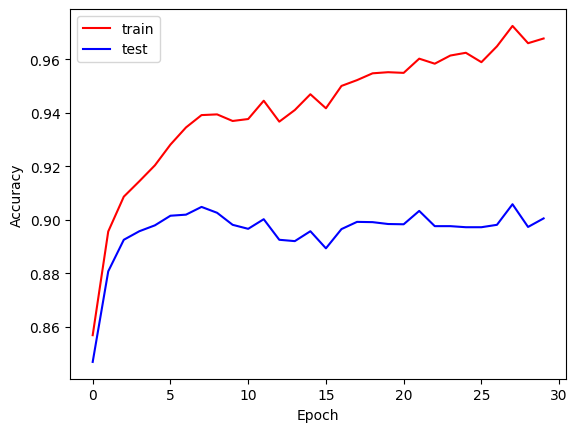

In [ ]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(t_acc, "r")
plt.plot(test_acc, "b")
plt.gca().legend(('train','test'))

c) Plot of the train loss per epoch

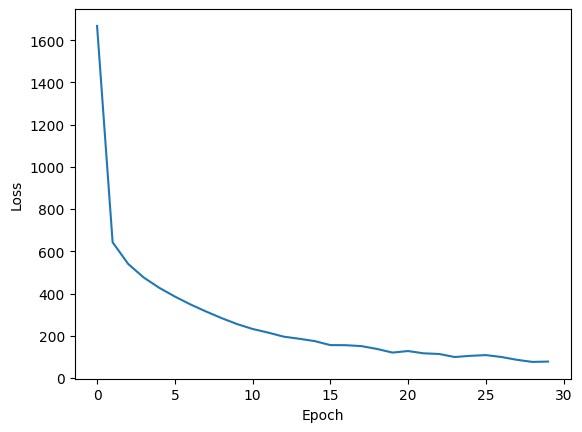

In [ ]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_epoch_array)

3. Tanh, Sigmoid and ELU

In [ ]:
for activation in ["tanh","sigmoid","elu"]:
    num_epochs = 30
    num_classes = 10
    batch_size = 100
    learning_rate = 0.1
    dropout_rate = 0
    # activations = ["tanh","sigmoid","elu"]
    print(activation)
    training_flag = True
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = MyCNN(num_classes,activation=activation,dropout_rate=dropout_rate,training_flag=training_flag).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    data = train_loader, test_loader
    [train_loader,test_loader] = data

    t_loss,t_acc,test_acc,final_test_accuracy,exec_time, loss_epoch_array = classify(device,net,data,criterion,optimizer,num_epochs,num_classes,batch_size,learning_rate,activation)
    end = [learning_rate,activation,dropout_rate,num_epochs,t_loss,t_acc,test_acc,final_test_accuracy,exec_time]
    result.append(end)

tanh
Epoch [1/30] 31.52 sec, loss_epoch: 2199.39 ,train_loss: 1.1078, train_acc: 0.7691, test_acc: 0.7609
Epoch [2/30] 24.42 sec, loss_epoch: 1941.06 ,train_loss: 0.9702, train_acc: 0.8515, test_acc: 0.8400
Epoch [3/30] 24.61 sec, loss_epoch: 1857.84 ,train_loss: 0.9120, train_acc: 0.8690, test_acc: 0.8585
Epoch [4/30] 24.09 sec, loss_epoch: 1818.95 ,train_loss: 0.9021, train_acc: 0.8746, test_acc: 0.8630
Epoch [5/30] 24.49 sec, loss_epoch: 1794.85 ,train_loss: 0.8912, train_acc: 0.8844, test_acc: 0.8738
Epoch [6/30] 24.17 sec, loss_epoch: 1775.68 ,train_loss: 0.8747, train_acc: 0.8940, test_acc: 0.8842
Epoch [7/30] 24.00 sec, loss_epoch: 1759.24 ,train_loss: 0.8731, train_acc: 0.8977, test_acc: 0.8847
Epoch [8/30] 24.02 sec, loss_epoch: 1744.82 ,train_loss: 0.9185, train_acc: 0.9020, test_acc: 0.8859
Epoch [9/30] 24.19 sec, loss_epoch: 1732.01 ,train_loss: 0.8543, train_acc: 0.9090, test_acc: 0.8919
Epoch [10/30] 24.51 sec, loss_epoch: 1722.67 ,train_loss: 0.8788, train_acc: 0.9151, t

4. 5 different learning rates: 0.001, 0.1, 0.5, 1, 10

In [ ]:
for learning_rate in [0.001,0.5,1,10]:
    num_epochs = 30
    num_classes = 10
    batch_size = 100
#     learning_rate = 0.1
    activation = "relu"
    dropout_rate = 0
    print(learning_rate)
    training_flag = True
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = MyCNN(num_classes,activation=activation,dropout_rate=dropout_rate,training_flag=training_flag).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    data = train_loader, test_loader
    [train_loader,test_loader] = data

    t_loss,t_acc,test_acc,final_test_accuracy,exec_time, loss_epoch_array = classify(device,net,data,criterion,optimizer,num_epochs,num_classes,batch_size,learning_rate,activation)
    end = [learning_rate,activation,dropout_rate,num_epochs,t_loss,t_acc,test_acc,final_test_accuracy,exec_time]
    result.append(end)

0.001
Epoch [1/30] 24.41 sec, loss_epoch: 4258.80 ,train_loss: 2.2545, train_acc: 0.4548, test_acc: 0.4579
Epoch [2/30] 24.35 sec, loss_epoch: 3761.81 ,train_loss: 1.9277, train_acc: 0.5085, test_acc: 0.5096
Epoch [3/30] 24.30 sec, loss_epoch: 2717.85 ,train_loss: 1.6679, train_acc: 0.5910, test_acc: 0.5876
Epoch [4/30] 24.13 sec, loss_epoch: 2364.67 ,train_loss: 1.6025, train_acc: 0.6099, test_acc: 0.6091
Epoch [5/30] 24.38 sec, loss_epoch: 2246.19 ,train_loss: 1.5823, train_acc: 0.6186, test_acc: 0.6175
Epoch [6/30] 24.18 sec, loss_epoch: 2189.87 ,train_loss: 1.5645, train_acc: 0.6240, test_acc: 0.6235
Epoch [7/30] 24.18 sec, loss_epoch: 2152.78 ,train_loss: 1.5469, train_acc: 0.6283, test_acc: 0.6279
Epoch [8/30] 24.60 sec, loss_epoch: 2123.40 ,train_loss: 1.5324, train_acc: 0.6320, test_acc: 0.6318
Epoch [9/30] 24.95 sec, loss_epoch: 2098.46 ,train_loss: 1.5153, train_acc: 0.6352, test_acc: 0.6344
Epoch [10/30] 24.18 sec, loss_epoch: 2076.22 ,train_loss: 1.5018, train_acc: 0.6383, 

In [ ]:
result = []
num_epochs = 30
num_classes = 10
batch_size = 100
learning_rate = 0.1
activation = "relu"
dropout_rate = 0.3
training_flag = True
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = MyCNN(num_classes,activation=activation,dropout_rate=dropout_rate,training_flag=training_flag).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
data = train_loader, test_loader
[train_loader,test_loader] = data

t_loss,t_acc,test_acc,final_test_accuracy,exec_time, loss_epoch_array = classify(device,net,data,criterion,optimizer,num_epochs,num_classes,batch_size,learning_rate,activation)
end = [learning_rate,activation,dropout_rate,num_epochs,t_loss,t_acc,test_acc,final_test_accuracy,exec_time]
result.append(end)

Epoch [1/30] 25.21 sec, loss_epoch: 2354.46 ,train_loss: 1.1638, train_acc: 0.8538, test_acc: 0.8442
Epoch [2/30] 24.47 sec, loss_epoch: 1895.04 ,train_loss: 0.9518, train_acc: 0.8874, test_acc: 0.8764
Epoch [3/30] 24.87 sec, loss_epoch: 1825.90 ,train_loss: 0.8751, train_acc: 0.8991, test_acc: 0.8853
Epoch [4/30] 24.85 sec, loss_epoch: 1734.15 ,train_loss: 1.0095, train_acc: 0.9138, test_acc: 0.8970
Epoch [5/30] 24.52 sec, loss_epoch: 1727.23 ,train_loss: 1.0546, train_acc: 0.9191, test_acc: 0.8996
Epoch [6/30] 24.47 sec, loss_epoch: 1703.55 ,train_loss: 0.6132, train_acc: 0.9187, test_acc: 0.8964
Epoch [7/30] 24.59 sec, loss_epoch: 1655.48 ,train_loss: 0.9272, train_acc: 0.9285, test_acc: 0.9004
Epoch [8/30] 24.50 sec, loss_epoch: 1635.19 ,train_loss: 0.8049, train_acc: 0.9275, test_acc: 0.8991
Epoch [9/30] 24.52 sec, loss_epoch: 1607.27 ,train_loss: 1.1932, train_acc: 0.9251, test_acc: 0.8954
Epoch [10/30] 24.53 sec, loss_epoch: 1589.57 ,train_loss: 0.5552, train_acc: 0.9315, test_a